In [2]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image
import yolov5
import os
import easyocr
from matplotlib import rc
import platform
import pytesseract
from RealESRGAN import RealESRGAN
from find_truck_license_plate import find_truck_license_plate
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
folder_path = './data/img_labeling/all'

# 폴더 내 모든 파일 리스트 가져오기
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

텍스트 거리에 따른 유사값 추출

In [4]:
import Levenshtein

def find_most_similar_string(query, database):
    most_similar = None
    max_similarity = 0

    for entry in database:
        # Levenshtein distance 계산
        similarity = Levenshtein.ratio(query, entry)
        if similarity > max_similarity:
            max_similarity = similarity
            most_similar = entry

    return most_similar, max_similarity

In [4]:
import torchvision.transforms as transforms
transform_low_res = transforms.Compose([
    transforms.ColorJitter(brightness=3.0, contrast=3.0, saturation=3.0, hue=0.5),  # 색상 변화 (밝기, 대비, 채도, 색조)
    transforms.ToTensor()  # 텐서로 변환
])

번호판 추출 (전처리되지 않은 기본 이미지)

In [5]:
license_plate_detections = [] 
results = []
for i, image_file in enumerate(image_files):
    img_path = os.path.join(folder_path, image_file)
    license_plate_detection, result = find_truck_license_plate(img_path, device)
    license_plate_detections.append(license_plate_detection)
    base_name = image_file.split('.')[0]
    if '_' in base_name:
        base_name = base_name.split('_')[0]
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    results.append(base_name + ',' +''.join(filtered_text))

results_copy = results



YOLOv5  2025-1-14 Python-3.11.11 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  2025-1-14 Python-3.11.11 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  2025-1-14 Python-3.11.11 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  2025-1-14 Python-3.11.11 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 
YOLOv5  2025-1-14 Python-3.11.11 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 2070, 8192MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
Adding AutoShape... 


In [13]:
augmented_data_X = []
save_directory = 'out/generator'
for i, low_res in enumerate(license_plate_detections):
    print(type(low_res))
    # 데이터 증강 적용
    low_res = Image.fromarray(low_res)
    augmented_data_X_iter = transform_low_res(low_res)
    print(augmented_data_X_iter.shape)
    for j in range(100):  # 5개의 증강된 데이터 샘플 생성
        file_name = ''
        augmented_data_X.append(augmented_data_X_iter)  # 배치 차원 제거 (0번 축)
        # 이미지 저장
        file_name = f'aug_{i}_{j}.png'  # 저장할 이미지 파일 이름
        save_path = os.path.join(save_directory, file_name) # 이미지 저장 경로
        img_np = (augmented_data_X_iter.cpu().numpy().transpose((1, 2, 0)) * 255).astype(np.uint8) # 텐서에서 numpy로 변환할 때 CPU로 이동
        img = Image.fromarray(img_np)
        img.save(save_path)

augmented_data_X = torch.stack(augmented_data_X, dim=0)  # dim=0은 배치 차원을 의미
augmented_data_X = torch.tensor(augmented_data_X, dtype=torch.float32)

<class 'numpy.ndarray'>
torch.Size([3, 107, 133])
<class 'numpy.ndarray'>
torch.Size([3, 180, 206])
<class 'numpy.ndarray'>
torch.Size([3, 163, 271])
<class 'numpy.ndarray'>
torch.Size([3, 176, 263])
<class 'numpy.ndarray'>
torch.Size([3, 114, 229])
<class 'numpy.ndarray'>
torch.Size([3, 194, 275])
<class 'numpy.ndarray'>
torch.Size([3, 188, 283])
<class 'numpy.ndarray'>
torch.Size([3, 175, 253])
<class 'numpy.ndarray'>
torch.Size([3, 213, 287])
<class 'numpy.ndarray'>
torch.Size([3, 153, 191])
<class 'numpy.ndarray'>
torch.Size([3, 157, 244])
<class 'numpy.ndarray'>
torch.Size([3, 169, 256])
<class 'numpy.ndarray'>
torch.Size([3, 185, 265])
<class 'numpy.ndarray'>
torch.Size([3, 186, 256])
<class 'numpy.ndarray'>
torch.Size([3, 189, 269])
<class 'numpy.ndarray'>
torch.Size([3, 199, 276])
<class 'numpy.ndarray'>
torch.Size([3, 170, 198])
<class 'numpy.ndarray'>
torch.Size([3, 121, 261])
<class 'numpy.ndarray'>
torch.Size([3, 196, 264])
<class 'numpy.ndarray'>
torch.Size([3, 214, 284])


RuntimeError: stack expects each tensor to be equal size, but got [3, 107, 133] at entry 0 and [3, 180, 206] at entry 100

model_RealESRGAN 적용

In [7]:
model_RealESRGAN = RealESRGAN(device, scale=4) # 이미지 업스케일링 scale=4 4배 확장
model_RealESRGAN.load_weights('weights/RealESRGAN_x4.pth', download=True) # 가중치 로드
license_plate_detections_RealESRGAN = [] 
results_RealESRGAN = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
    img_pil = Image.fromarray(img_np)  # numpy -> PIL
    img_pil = model_RealESRGAN.predict(img_pil)  # Realesrgan으로 해상도 개선
    img_np = np.array(img_pil)
    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(img_np)
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_RealESRGAN.append(img_pil)
    results_RealESRGAN.append(base_name + ',' +''.join(filtered_text))

Clahe 적용

In [ ]:
license_plate_detections_Clahe = [] 
results_Clahe = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL
    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(clahe_img_np)
    number = ''.join([res[1] for res in results])  # 번호 추출
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_Clahe.append(img_pil)
    results_Clahe.append(base_name + ',' +''.join(filtered_text))

_Clahe_RealESRGAN 적용

In [14]:
license_plate_detections_Clahe_RealESRGAN = [] 
results_Clahe_RealESRGAN = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
   #RealESRGAN + CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL
    img_pil = img_pil.convert('RGB')
    img_pil = model_RealESRGAN.predict(img_pil)  # Realesrgan으로 해상도 개선
    img_np = np.array(img_pil)
    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(img_np)
    number = ''.join([res[1] for res in result])  # 번호 추출
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_Clahe_RealESRGAN.append(img_pil)
    results_Clahe_RealESRGAN.append(base_name + ',' +''.join(filtered_text))

binary

In [23]:
license_plate_detections_binary = [] 
results_binary = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
   #RealESRGAN + CLAHE 적용
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    _, binary_np = cv2.threshold(gray_img_np, 100, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(binary_np)
    number = ''.join([res[1] for res in results])  # 번호 추출

    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_binary.append(binary_np)
    results_binary.append(base_name + ',' +''.join(filtered_text))

Clahe_RealESRGAN_threshold 적용

In [26]:
license_plate_detections_Clahe_RealESRGAN_threshold = [] 
results_Clahe_RealESRGAN_threshold = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
    #RealESRGAN + CLAHE  + threshold 적용
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL
    img_pil = img_pil.convert('RGB')
    img_pil = model_RealESRGAN.predict(img_pil)  # Realesrgan으로 해상도 개선
    img_np = np.array(img_pil)
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    _, binary_np = cv2.threshold(gray_img_np, 50, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(binary_np)
    number = ''.join([res[1] for res in result])  # 번호 추출
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_Clahe_RealESRGAN_threshold.append(binary_np)
    results_Clahe_RealESRGAN_threshold.append(base_name + ',' +''.join(filtered_text))

_Clahe_RealESRGAN_angle 적용

In [30]:
license_plate_detections_Clahe_RealESRGAN_angle = [] 
results_Clahe_RealESRGAN_angle = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
   #RealESRGAN + CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL
    img_pil = img_pil.convert('RGB')
    img_pil = model_RealESRGAN.predict(img_pil)  # Realesrgan으로 해상도 개선
    img_np = np.array(img_pil)


    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    #비선형 필터인 Non-Local Means (NLM)
    denoised_img_np = cv2.fastNlMeansDenoising(gray_img_np, None, 30, 7, 21)
    #이미지에서 엣지를 검출
    edges_np = cv2.Canny(denoised_img_np, 100, 200)
    #이미지에서 직선을 검출
    lines_np = cv2.HoughLines(edges_np, 1, np.pi/180, 100)
    angles = []
    for line in lines_np:
        rho, theta = line[0]
        angle = np.degrees(theta) - 90  # 각도를 수평에 대해 계산
        angles.append(angle)

    median_angle = np.median(angles)
    print(f"Detected skew angle: {median_angle}")

    (h, w) = gray_img_np.shape[:2]
    center = (w // 2, h // 2)

    # 회전 행렬 생성
    M = cv2.getRotationMatrix2D(center, median_angle, 1.0)

    # 이미지를 회전하여 기울기 보정
    rotated_img_np = cv2.warpAffine(img_np, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    rotated_img_pil = Image.fromarray(rotated_img_np)

    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(rotated_img_np)
    number = ''.join([res[1] for res in result])  # 번호 추출
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_Clahe_RealESRGAN_angle.append(rotated_img_pil)
    results_Clahe_RealESRGAN_angle.append(base_name + ',' +''.join(filtered_text))

Detected skew angle: 13.999992370605469
Detected skew angle: 15.999992370605469
Detected skew angle: 12.999992370605469
Detected skew angle: 12.999992370605469
Detected skew angle: 9.999992370605469
Detected skew angle: 17.99999237060547
Detected skew angle: 11.999992370605469
Detected skew angle: 14.999992370605469
Detected skew angle: 13.999992370605469
Detected skew angle: 17.49999237060547
Detected skew angle: 13.999992370605469
Detected skew angle: 14.999992370605469
Detected skew angle: 16.99999237060547
Detected skew angle: 14.999992370605469
Detected skew angle: 9.999992370605469
Detected skew angle: 9.999992370605469
Detected skew angle: 6.0
Detected skew angle: 11.999992370605469
Detected skew angle: 20.99999237060547
Detected skew angle: 19.99999237060547
Detected skew angle: 15.999992370605469
Detected skew angle: 12.999992370605469
Detected skew angle: 11.999992370605469
Detected skew angle: 12.999992370605469
Detected skew angle: 17.99999237060547
Detected skew angle: 16.

In [61]:
license_plate_detections_Clahe = [] 
results_Clahe = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info.split(',')[0]
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL

    reader = easyocr.Reader(['en', 'ko'], gpu=True)
    result = reader.readtext(clahe_img_np)


    for bbox, text, _ in result:
            # 박스의 좌표 추출 (각각의 bbox는 네 개의 좌표로 구성)
        pts = bbox
        pts = np.array(pts, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))

            # 번호판 텍스트 주변에 빨간색 박스 그리기
        clahe_img_np = cv2.polylines(clahe_img_np, [pts], isClosed=True, color=(0, 0, 255), thickness=2)

            # 텍스트 위치에 텍스트 표시 (박스 근처에)
        clahe_img_np = cv2.putText(clahe_img_np, text, (pts[0][0][0], pts[0][0][1] - 10),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)



    number = ''.join([res[1] for res in results])  # 번호 추출
    filtered_text = []
    for (_, text, _) in result:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    # number = ''.join([res[1] for res in results])  # 번호 추출
    license_plate_detections_Clahe.append(img_pil)
    results_Clahe.append(base_name + ',' +''.join(filtered_text))

In [6]:
model_RealESRGAN = RealESRGAN(device, scale=4) # 이미지 업스케일링 scale=4 4배 확장
model_RealESRGAN.load_weights('weights/RealESRGAN_x4.pth', download=True) # 가중치 로드
license_plate_detections_Clahe_RealESRGAN_angle = [] 
results_Clahe_RealESRGAN_angle = []
for i, (img_np, number_info) in enumerate(zip(license_plate_detections, results)):
    base_name = number_info
   #RealESRGAN + CLAHE 적용
    clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(8, 8))
    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    clahe_img_np = clahe.apply(gray_img_np)
    img_pil = Image.fromarray(clahe_img_np)  # numpy -> PIL
    img_pil = img_pil.convert('RGB')
    img_pil = model_RealESRGAN.predict(img_pil)  # Realesrgan으로 해상도 개선
    img_np = np.array(img_pil)


    gray_img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)

# 비선형 필터인 Non-Local Means (NLM)로 이미지 노이즈 제거
    denoised_img_np = cv2.fastNlMeansDenoising(gray_img_np, None, 30, 7, 21)

# Canny 엣지 검출
    edges_np = cv2.Canny(denoised_img_np, 100, 200)

# 허프 직선 변환 (P를 사용하여 더 정교하게 직선 검출)
    lines_np = cv2.HoughLinesP(edges_np, 1, np.pi / 180, 100, minLineLength=50, maxLineGap=10)

# 직선 각도 계산
    angles = []
    for line in lines_np:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))  # 기울기 계산
        angles.append(angle)

# 각도가 너무 분산되거나 직선이 적으면 무시할 수 있도록 조정
    if len(angles) > 0:
        median_angle = np.median(angles)
    else:
        median_angle = 0  # 직선이 없다면 각도 0으로 처리
    print(f"Detected skew angle: {median_angle}")

# 이미지 크기
    (h, w) = gray_img_np.shape[:2]
    center = (w // 2, h // 2)

# 회전 행렬 생성
    M = cv2.getRotationMatrix2D(center, median_angle, 1.0)

# 이미지를 회전시켜 기울기 보정
    rotated_img_np = cv2.warpAffine(img_np, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT)

# 결과 이미지 PIL 객체로 변환
    rotated_img_pil = Image.fromarray(rotated_img_np)

    alpha = 1.5  # 대비 강도 (1은 원본 이미지, 2는 대비 증가)
    beta = -100    # 밝기 조정 (0은 원본 이미지)

    adjusted_image = cv2.convertScaleAbs(rotated_img_np, alpha=alpha, beta=beta)

    sharpen_kernel = np.array([[-1, -1, -1],
                           [-1, 9, -1],
                           [-1, -1, -1]])

    sharpened_image = cv2.filter2D(adjusted_image, -1, sharpen_kernel)


    reader = easyocr.Reader(['ko'], gpu=True)
    resultss = reader.readtext(sharpened_image)

    # for bbox, text, _ in resultss:
    #         # 박스의 좌표 추출 (각각의 bbox는 네 개의 좌표로 구성)
    #     pts = bbox
    #     pts = np.array(pts, dtype=np.int32)
    #     pts = pts.reshape((-1, 1, 2))

    #         # 번호판 텍스트 주변에 빨간색 박스 그리기
    #     sharpened_image = cv2.polylines(sharpened_image, [pts], isClosed=True, color=(0, 0, 255), thickness=2)

    #         # 텍스트 위치에 텍스트 표시 (박스 근처에)
    #     sharpened_image = cv2.putText(sharpened_image, text, (pts[0][0][0], pts[0][0][1] - 10),
    #                         cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2, cv2.LINE_AA)
    
    # save_directory = 'out/'
    # # 이미지 저장
    # file_name = f'{base_name} + {i}.png'  # 저장할 이미지 파일 이름
    # save_path = os.path.join(save_directory, file_name) # 이미지 저장 경로
    # img = Image.fromarray(sharpened_image)
    # img.save(save_path)


    filtered_text = []
    for (_, text, _) in resultss:
    # 한글과 숫자만 추출 (기호는 제외)
        filtered = ''.join([char for char in text if char.isdigit() or ('가' <= char <= '힣')])
        if filtered:  # 빈 문자열을 추가하지 않도록
            filtered_text.append(filtered)
    license_plate_detections_Clahe_RealESRGAN_angle.append(sharpened_image)
    results_Clahe_RealESRGAN_angle.append(base_name + ',' +''.join(filtered_text))

Detected skew angle: 13.954509173136845
Detected skew angle: 17.715792706376938
Detected skew angle: 14.796762245057346
Detected skew angle: 13.141069757715405
Detected skew angle: 13.153708194476893
Detected skew angle: 15.215073141200222
Detected skew angle: 13.62272889177478
Detected skew angle: 14.412715157791418
Detected skew angle: 15.051219992590978
Detected skew angle: 17.95616515262674
Detected skew angle: 13.92096036492075
Detected skew angle: 16.032339353935967
Detected skew angle: 16.69924423399362
Detected skew angle: 12.900500342159216
Detected skew angle: 13.28486648490219
Detected skew angle: 13.821838156770884
Detected skew angle: 14.832521801777776
Detected skew angle: 12.245836201707657
Detected skew angle: 17.43257960774252
Detected skew angle: 18.082856442277258
Detected skew angle: 16.090816348852172
Detected skew angle: 12.962584129429636
Detected skew angle: 13.799485396019369
Detected skew angle: 14.703551823761563
Detected skew angle: 16.26020470831196
Detecte

23  :  27 (맞힌 갯수 : total)


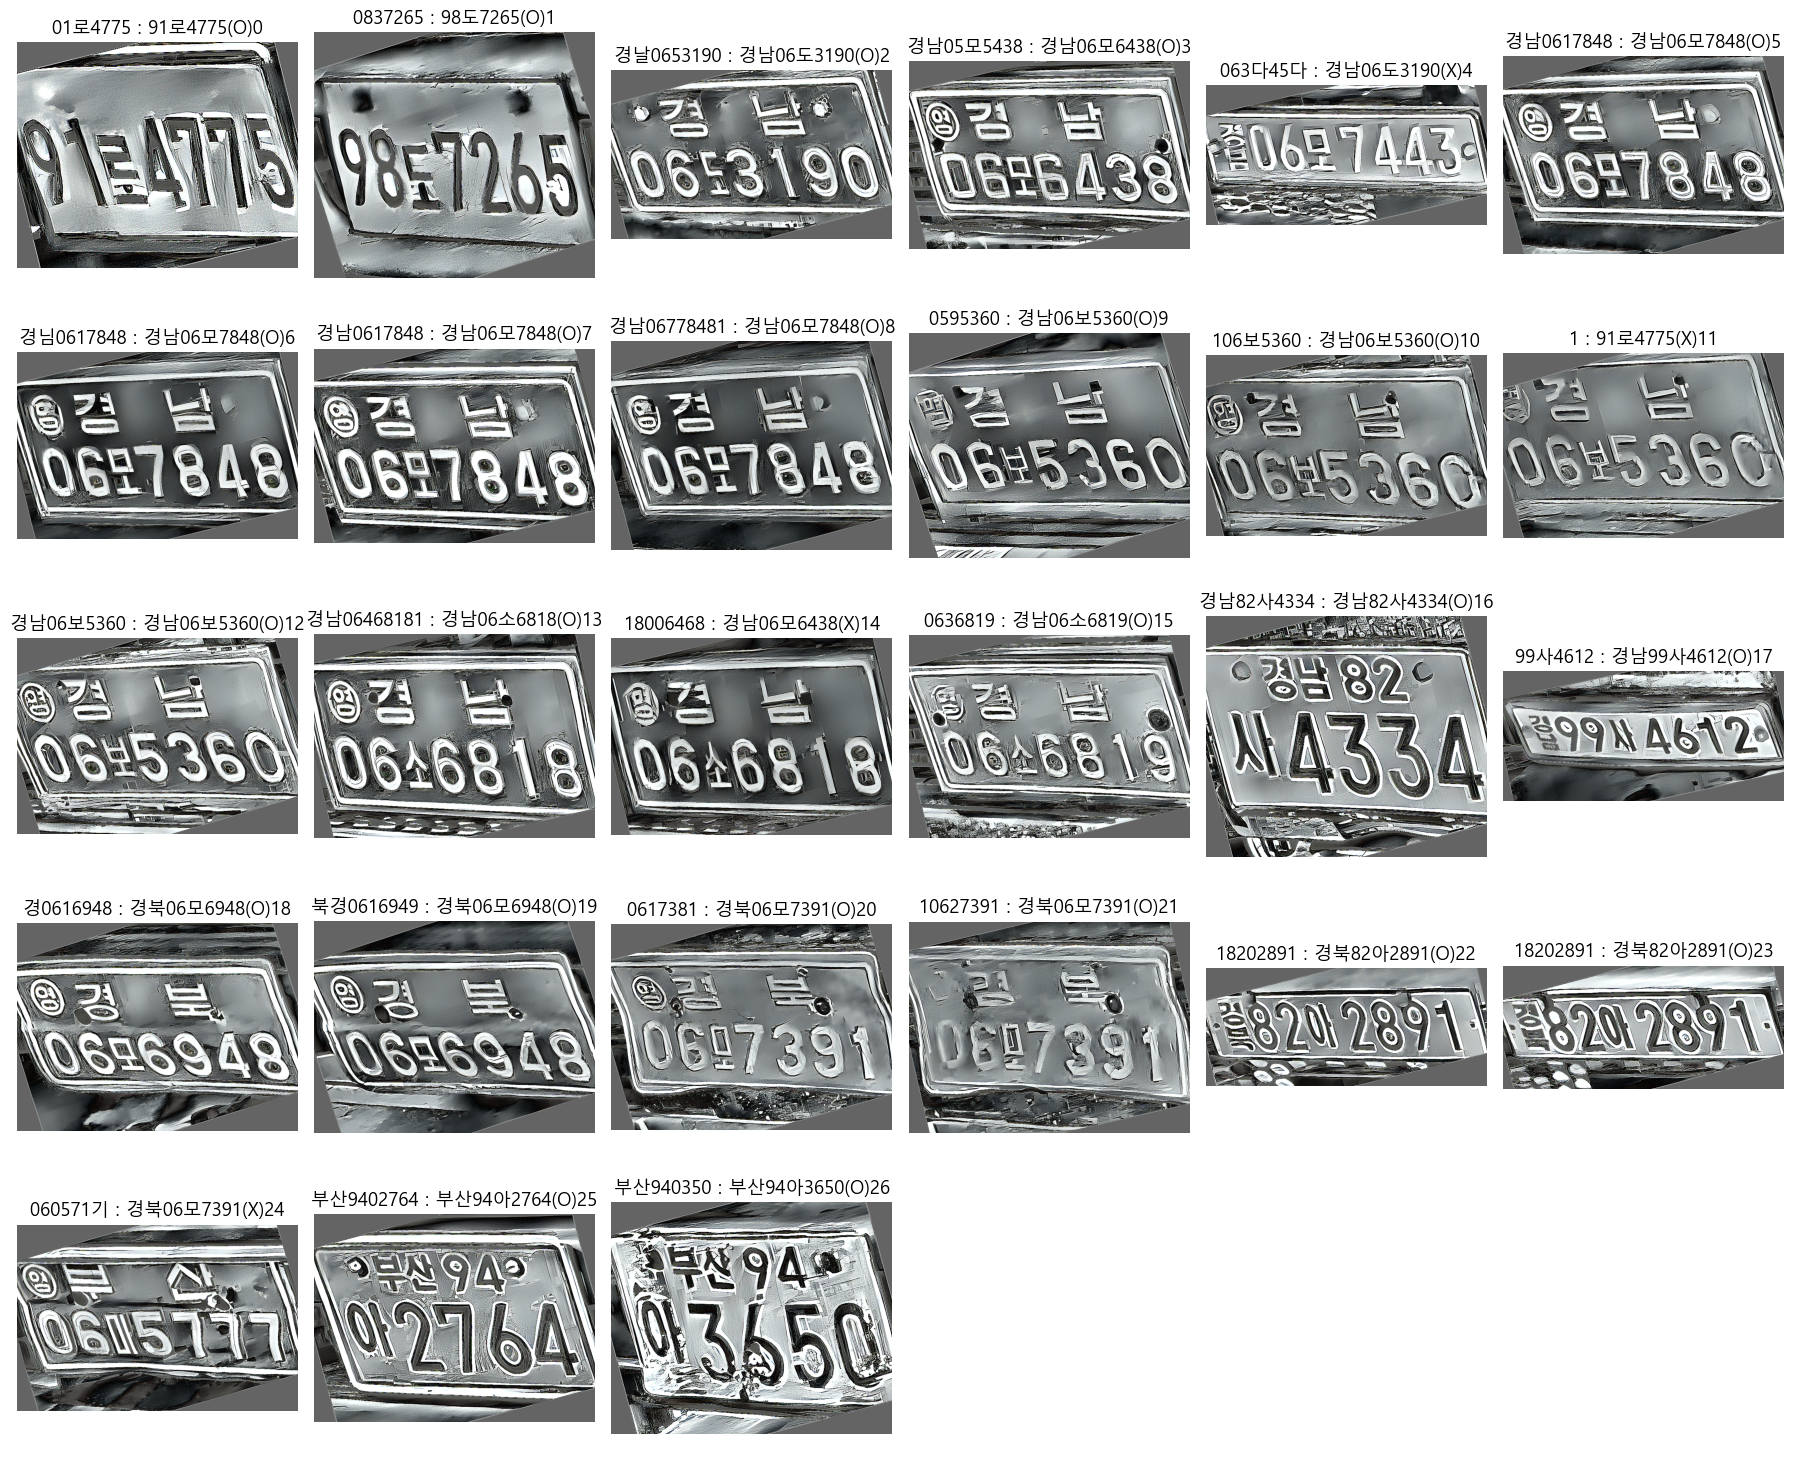

In [19]:
%matplotlib inline

image_count = 27
rows = 5
cols = 6
accuracy = 0
check = '(X)'
database = ["91로4775", "98도7265", "경남06도3190", "경남06모6438", "경남06모7443", "경남06모7848", "경남06보5360", 
            "경남06소6818", "경남06소6819", "경남82사4334", "경남99사4612", "경북06모6948", "경북06모7391", "경북82아2891", 
            "부산06마5777", "부산94아2764", "부산94아3650"]

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')  # Windows의 경우
elif platform.system() == 'Darwin':  # macOS의 경우
    rc('font', family='AppleGothic')
else:  # Linux의 경우
    rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(rows, cols, figsize=(18, 15))

for i, (image, number_info) in enumerate(zip(license_plate_detections_Clahe_RealESRGAN_angle, results_Clahe_RealESRGAN_angle)):
    number_key = number_info.split(',')[0]
    number_value = number_info.split(',')[1]
    
    most_similar, similarity = find_most_similar_string(number_value, database)
    
    if most_similar is None:
        most_similar = "알 수 없음"  # 적절한 기본값으로 설정
    if number_key == most_similar: 
        accuracy += 1
        check = '(O)'

    number = number_value + " : " + most_similar + check + str(i)
    
    ax = axes[i // cols, i % cols]
    ax.imshow(image)
    ax.axis('off')  # 축 숨기기
    ax.set_title(number)
    
    check = '(X)'

print(accuracy, " : ", len(license_plate_detections), "(맞힌 갯수 : total)")

for j in range(i + 1, rows * cols):
    axes[j // cols, j % cols].axis('off')

plt.tight_layout()  # 서브플롯 간격 자동 조정
plt.show()


In [11]:
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

class FixedRotation(object):
    def __init__(self, angle, fill = (127,127,127)):
        self.angle = angle
        self.fill = fill
    def __call__(self, img):
        return F.rotate(img, self.angle, expand=True, fill= self.fill)

transform_low_res = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ColorJitter(brightness=(1.0, 4.0), contrast=(1.0, 4.0), saturation=(1.0, 4.0), hue=(0.1, 0.5)),
    FixedRotation(angle=270, fill = (127,127,127)),
    transforms.ToTensor()
])

In [10]:
save_train = 'out/dataset2/train/images'
save_val = 'out/dataset2/val/images'
save_test = 'out/dataset2/test/images'
os.makedirs(save_train, exist_ok=True)
os.makedirs(save_val, exist_ok=True)
os.makedirs(save_test, exist_ok=True)

for i, (low_res,name) in enumerate(zip(license_plate_detections_Clahe_RealESRGAN_angle,results_Clahe_RealESRGAN_angle)):
    print(type(low_res))
    basename = name.split(",")[0]
    # 데이터 증강 적용
    low_res = Image.fromarray(low_res)

    for j in range(100):  # 5개의 증강된 데이터 샘플 생성
        augmented_data_X_iter = transform_low_res(low_res)
        file_name = ''
        # augmented_data_X.append(augmented_data_X_iter)  # 배치 차원 제거 (0번 축)
        # 이미지 저장
        if j < 70 :
            file_name = f'{i+27}_{basename}_{j}.png'  # 저장할 이미지 파일 이름    
            save_path = os.path.join(save_train, file_name) # 이미지 저장 경로
            img_np = (augmented_data_X_iter.cpu().numpy().transpose((1, 2, 0)) * 255).astype(np.uint8) # 텐서에서 numpy로 변환할 때 CPU로 이동
            img = Image.fromarray(img_np)
            img.save(save_path)
        elif j < 85 : 
            file_name = f'{i+27}_{basename}_{j}.png'  # 저장할 이미지 파일 이름    
            save_path = os.path.join(save_val, file_name) # 이미지 저장 경로
            img_np = (augmented_data_X_iter.cpu().numpy().transpose((1, 2, 0)) * 255).astype(np.uint8) # 텐서에서 numpy로 변환할 때 CPU로 이동
            img = Image.fromarray(img_np)
            img.save(save_path)
        else : 
            file_name = f'{i+27}_{basename}_{j}.png'  # 저장할 이미지 파일 이름    
            save_path = os.path.join(save_test, file_name) # 이미지 저장 경로
            img_np = (augmented_data_X_iter.cpu().numpy().transpose((1, 2, 0)) * 255).astype(np.uint8) # 텐서에서 numpy로 변환할 때 CPU로 이동
            img = Image.fromarray(img_np)
            img.save(save_path)



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
